My DataSet is about ( Chess ) , i will consider the performance of the White & Black players 


There are 3 questions until now 


The 1st one : What is the best ? be the White or Black player ? or there is no diff ? 

The 2nd one : Are there any relation between who rated and who not ?

The 3rd one : The larger numder of turns mean any thing ? In my opinion: I expect that the larger number of turns may lead to the DRAW , because each player moves a lot but no perfect result 

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sas 

Firstly, I wil read the file that contains the DataSet ( Chess )

In [1]:
df = pd.read_csv("games.csv")  

NameError: name 'pd' is not defined

Now, checking the DataSet if contains null values or not 

In [143]:
print(len(df))         #To evaluate the no. of elements in each column in the DataSet
df.isnull().count()    #To check if there any null values 

20058


id                20058
rated             20058
created_at        20058
last_move_at      20058
turns             20058
victory_status    20058
winner            20058
increment_code    20058
white_id          20058
white_rating      20058
black_id          20058
black_rating      20058
moves             20058
opening_eco       20058
opening_name      20058
opening_ply       20058
dtype: int64

From the above informations we conclude that our DataSet doesn’t contain any null values ,so it is ready to the visualization!  

In [44]:
df.info()   #Just more informations about the DataSet 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 17 columns):
id                20058 non-null object
rated             20058 non-null bool
created_at        20058 non-null float64
last_move_at      20058 non-null float64
turns             20058 non-null int64
victory_status    20058 non-null object
winner            20058 non-null object
increment_code    20058 non-null object
white_id          20058 non-null object
white_rating      20058 non-null int64
black_id          20058 non-null object
black_rating      20058 non-null int64
moves             20058 non-null object
opening_eco       20058 non-null object
opening_name      20058 non-null object
opening_ply       20058 non-null int64
No. of winners    20058 non-null int64
dtypes: bool(1), float64(2), int64(5), object(9)
memory usage: 2.5+ MB


df.describe()   #A describtion to the Data 

Now , i will check the questions above 

The 1st question : What is the best ? be the White or Black player ? or there is no diff ? 

So, i want to plot a relation between winner(White,Black) and No. of wins for each one 

In [51]:
df.winner 

0        white
1        black
2        white
3        white
4        white
5         draw
6        white
7        black
8        black
9        white
10       white
11       black
12       black
13       black
14       white
15       black
16       black
17       black
18       black
19       white
20       black
21       white
22       white
23       white
24       black
25       white
26       white
27       black
28       black
29       black
         ...  
20028    white
20029    black
20030    black
20031    black
20032    white
20033    black
20034     draw
20035    white
20036    white
20037    black
20038    black
20039    white
20040    black
20041    black
20042    white
20043    white
20044    white
20045    white
20046    black
20047    white
20048    white
20049    white
20050    white
20051    black
20052    white
20053    white
20054    black
20055    white
20056    white
20057    black
Name: winner, Length: 20058, dtype: object

In [26]:
len(df.winner)    #No. of winners (White , Black)

20058

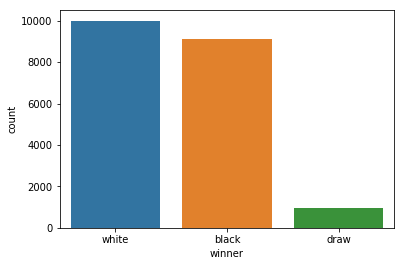

In [68]:
plt.figure()
sas.countplot(df.winner)
plt.show()

From the plot above it obvious that the White is the better so we conclude that the probability to win the game is bigger when you start the game (i.e be the White player)

Now , the 2nd question : Are there any relation between who rated and who not ?

So, i will calculate the number of white palyers who rated and who not , Also the numder of black players who rated and who not ,and then plot the relation and observe the result

In [152]:
df_white=df[df.winner == "white"]   #All white players
df_black=df[df.winner == "black"]   #All black players

In [153]:
df_white_rated1=df_white[df_white.rated == True]   #All white players who rated
df_white_rated1
len(df_white_rated1)

8052

In [154]:
df_white_rated2=df_white[df_white.rated == False]  #All white players who not rated
df_white_rated2
len(df_white_rated2)

1949

In [148]:
df_black_rated1=df_black[df_black.rated == True]  #All black players who rated
df_black_rated1
len(df_black_rated1)

7384

In [155]:
df_black_rated2=df_black[df_black.rated == False]   #All black players who not rated
df_black_rated2
len(df_black_rated2)

1723

I create two lists , the 1st one contain the winners and rated , the 2nd one contain the values

In [156]:
winner_rated = ["White & True","White & False","Black & True","Black & False"]
Values = [8052 ,1949 ,7384 ,1723 ]

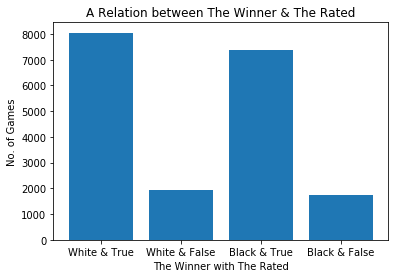

In [163]:
plt.figure()
plt.bar(winner_rated,Values)
plt.xlabel("The Winner with The Rated")
plt.ylabel("No. of Games")
plt.title("A Relation between The Winner & The Rated")
plt.show()

From the plot above , the number of white players who rated is the bigger and also we see previously that the white has a better probability to win so that’s indicate to important thing : that when the player choose to play in rate then he will play more better than without rate , maybe this because he will become more careful , since if he lost he will not lose the game! also will lose points 

Now , The 3rd question : sometimes the game still too much time ,what is this mean ? In my opinion: I expect that this will lead to the DRAW , because each player moves a lot but no perfect result 

So , i will calculate the time of each game and make a relation between the time and the winner column to conclude if my expectation is True or False 

In [158]:
df["Time of the Game"]=(df.last_move_at - df.created_at)/(60000)  #In minutes 
df

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,Time of the Game
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,0.000000
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,0.000000
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,0.000000
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,0.000000
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,0.000000
5,MsoDV9wj,False,1.504240e+12,1.504240e+12,5,draw,draw,10+0,trelynn17,1250,franklin14532,1002,e4 c5 Nf3 Qa5 a3,B27,Sicilian Defense: Mongoose Variation,4,0.000000
6,qwU9rasv,True,1.504230e+12,1.504230e+12,33,resign,white,10+0,capa_jr,1520,daniel_likes_chess,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10,0.000000
7,RVN0N3VK,False,1.503680e+12,1.503680e+12,9,resign,black,15+30,daniel_likes_chess,1413,soultego,2108,e4 Nc6 d4 e5 d5 Nce7 c3 Ng6 b4,B00,Nimzowitsch Defense: Kennedy Variation | Link...,5,0.000000
8,dwF3DJHO,True,1.503510e+12,1.503510e+12,66,resign,black,15+0,ehabfanri,1439,daniel_likes_chess,1392,e4 e5 Bc4 Nc6 Nf3 Nd4 d3 Nxf3+ Qxf3 Nf6 h3 Bc5...,C50,Italian Game: Schilling-Kostic Gambit,6,0.000000
9,afoMwnLg,True,1.503440e+12,1.503440e+12,119,mate,white,10+0,daniel_likes_chess,1381,mirco25,1209,e4 d5 exd5 Qxd5 Nc3 Qe5+ Be2 Na6 d4 Qf5 Bxa6 b...,B01,Scandinavian Defense: Mieses-Kotroc Variation,4,0.000000


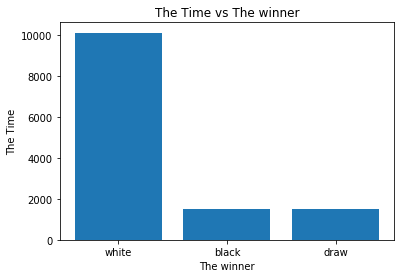

In [162]:
plt.figure()
plt.bar(df.winner,df['Time of the Game'])
plt.xlabel("The winner")
plt.ylabel("The Time")
plt.title("The Time vs The winner")
plt.show()

Actually , the result surprise me , it is so far from my expectation , anyway the result we have that when the game has too much time then the most one has the probabiltiy to win is the white player,maybe that’s refer to the first move he made or the stratgy that began the game with it , which make our results Proportionate and homogeneous since it is all indicates that the white player is better 

The Conclusion : it’s better to choose to be the white player at the beggining of the game 